# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [44]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [45]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [35]:
# print the first 500 characters to see a sample of the data

print(results[:1000])

{"type":"FeatureCollection","metadata":{"generated":1615438993000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":483},"features":[{"type":"Feature","properties":{"mag":3.08,"place":"5 km ESE of La Parguera, Puerto Rico","time":1615434968050,"updated":1615437980040,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/pr2021070000","detail":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2021070000.geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":146,"net":"pr","code":"2021070000","ids":",us7000di14,pr2021070000,","sources":",us,pr,","types":",origin,phase-data,","nst":21,"dmin":0.0427,"rms":0.15,"gap":212,"magType":"md","type":"earthquake","title":"M 3.1 - 5 km ESE of La Parguera, Puerto Rico"},"geometry":{"type":"Point","coordinates":[-67.0056,17.9511,8]},"id":"pr2021070000"},
{"type":"Feature

In [37]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 3.08, 'place': '5 km ESE of La Parguera, Puerto Rico', 'time': 1615434968050, 'updated': 1615436615810, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2021070000', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2021070000.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 146, 'net': 'pr', 'code': '2021070000', 'ids': ',pr2021070000,', 'sources': ',pr,', 'types': ',origin,phase-data,', 'nst': 21, 'dmin': 0.0427, 'rms': 0.15, 'gap': 212, 'magType': 'md', 'type': 'earthquake', 'title': 'M 3.1 - 5 km ESE of La Parguera, Puerto Rico'}, 'geometry': {'type': 'Point', 'coordinates': [-67.0056, 17.9511, 8]}, 'id': 'pr2021070000'}


In [41]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])

pp.pprint(quakes[0]['properties'])

{'coordinates': [-67.0056, 17.9511, 8], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '2021070000',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2021070000.geojson',
 'dmin': 0.0427,
 'felt': None,
 'gap': 212,
 'ids': ',pr2021070000,',
 'mag': 3.08,
 'magType': 'md',
 'mmi': None,
 'net': 'pr',
 'nst': 21,
 'place': '5 km ESE of La Parguera, Puerto Rico',
 'rms': 0.15,
 'sig': 146,
 'sources': ',pr,',
 'status': 'reviewed',
 'time': 1615434968050,
 'title': 'M 3.1 - 5 km ESE of La Parguera, Puerto Rico',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',origin,phase-data,',
 'tz': None,
 'updated': 1615436615810,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2021070000'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 3.1 - 5 km ESE of La Parguera, Puerto Rico
M 4.5 - south of the Kermadec Islands
M 4.7 - 123 km W of El Aguilar, Argentina
M 4.9 - southeast of the Loyalty Islands
M 5.1 - Kermadec Islands region
M 4.6 - 241 km ENE of Gisborne, New Zealand
M 5.0 - south of the Kermadec Islands
M 4.7 - 20 km SSW of Tarime, Tanzania
M 4.2 - 17 km NNE of Pāhala, Hawaii
M 5.1 - south of the Kermadec Islands
M 4.3 - 137 km E of Atka, Alaska
M 2.6 - 68 km W of Karluk, Alaska
M 4.3 - 43 km S of Jurm, Afghanistan
M 3.0 - 33 km NW of Stanley, Idaho
M 2.8 - 6 km SE of La Parguera, Puerto Rico
M 2.6 - 5 km ESE of La Parguera, Puerto Rico
M 4.8 - Kermadec Islands region
M 5.0 - 286 km WNW of Haveluloto, Tonga
M 2.9 - 27km W of Petrolia, CA
M 4.7 - 41 km W of Gonābād, Iran
M 5.8 - 280 km WNW of Haveluloto, Tonga
M 5.1 - south of the Kermadec Islands
M 4.6 - south of the Fiji Islands
M 4.2 - 49 km S of Ordos, China
M 2.7 - 5 km SW of Dibble, Oklahoma
M 5.1 - 84 km ESE of Kokopo, Papua New Guinea
M 4.1 - 125 km NNW

M 5.5 - Kermadec Islands region
M 5.1 - 195 km NE of Gisborne, New Zealand
M 4.3 - 189 km NE of Gisborne, New Zealand
M 3.4 - 241 km SE of Chiniak, Alaska
M 2.5 - 4 km ENE of Pāhala, Hawaii
M 5.1 - 220 km NE of Gisborne, New Zealand
M 4.3 - 58 km SSE of Shizunai-furukawachō, Japan
M 2.7 - 4km NNW of The Geysers, CA
M 4.3 - 176 km NE of Gisborne, New Zealand
M 4.5 - 197 km NE of Gisborne, New Zealand
M 4.3 - 103 km ESE of Arica, Chile
M 5.0 - Kermadec Islands region
M 3.4 - 115 km SE of Perryville, Alaska
M 5.0 - 208 km NE of Gisborne, New Zealand
M 5.2 - Kermadec Islands region
M 2.6 - 14 km S of Fern Forest, Hawaii
M 6.3 - 182 km NE of Gisborne, New Zealand
M 4.7 - 59 km SW of Puerto Santa, Peru
M 5.1 - 214 km NE of Gisborne, New Zealand
M 5.0 - Kermadec Islands region
M 5.6 - Kermadec Islands region
M 4.8 - West Chile Rise
M 5.1 - 194 km NE of Gisborne, New Zealand
M 5.1 - Kermadec Islands, New Zealand
M 5.1 - Kermadec Islands region
M 4.2 - 2 km NW of Bo‘ka, Uzbekistan
M 2.8 - 27 km

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

483


In [9]:
# print the first few lines of data

print(df.head())

   magnitude   depth
0       3.08    8.00
1       4.50   10.00
2       4.70  248.65
3       4.90   35.00
4       5.10   10.00


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  483.000000  483.000000
mean     4.431905   37.472967
std      1.040337   85.115102
min      2.460000   -3.350000
25%      3.770000   10.000000
50%      4.700000   10.000000
75%      5.100000   16.975000
max      8.100000  600.770000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

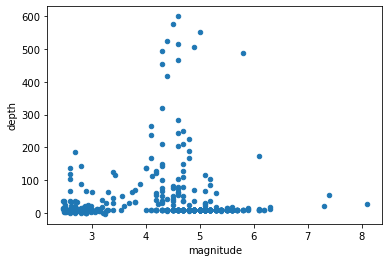

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude   depth
0           0       3.08    8.00
1           1       4.50   10.00
2           2       4.70  248.65
3           3       4.90   35.00
4           4       5.10   10.00


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [17]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [18]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [19]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [20]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [21]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [43]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyMBB: Last preparations ✅
#SECMBB 🔜
RT @SEC: Rest up, #SEC fam...

Day 2 is going to be a good one 👏 #SECMBB https://t.co/W0zEQoCRKF
RT @KentuckyMBB: Working toward one goal 😤

#BBNasvhille x #SECMBB https://t.co/nvlyiuQ0Gy
RT @UKFootball: Excited to announce spring practice begins on Tuesday. We will practice 15 times during this spring.

📰🔗 https://t.co/ny4Zz…
RT @KentuckyTrack: Our #NCAATF campaign begins tomorrow with @Annika2019 making her debut in the NCAA Indoor Championships Pentathlon 

Mee…


In [23]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Mar 11 04:09:27 +0000 2021',
 'entities': {'hashtags': [{'indices': [37, 44], 'text': 'SECMBB'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 35583547,
                                 'id_str': '35583547',
                                 'indices': [3, 15],
                                 'name': 'Kentucky Basketball',
                                 'screen_name': 'KentuckyMBB'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1369863011234635777,
 'id_str': '1369863011234635777',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 8,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      '

### Other API endpoints allow different types of searches

In [24]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @UKhoops1_BBN: Kentucky still heavily involved in 4 star Brandin Podziemski recruitment per source #BBN

Brennan Canada, Zan Payne, Riley Welch, Kareem Watkins

BENCH MOB!!

@young_payne2321 @brennanc14 @Riley__Welch #BBN

Camron Fletcher

Cam has fallen out of the rotation since the bench incident earlier in the season. He has brought… https://t.co/tBgzVuK3Qk

Dontaie Allen and Lance Ware

Cal said a couple of weeks ago that he had shortened his rotation, excluding these tw… https://t.co/yh4bRUZso8

Olivier Sarr

Sarr just needs to be tough down low. He’s a good outside shooter but is often weak u see the bucket.… https://t.co/uqzJziCSbp



In [25]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @myogiadityanath: भगवान भोलेनाथ की पावन आराधना को समर्पित 'महाशिवरात्रि' के पर्व की सभी भक्तों एवं प्रदेशवासियों को अनंत शुभकामनाएं।

दे…

Sheesh 🔥 https://t.co/90XGoewW2H

RT @AnilKum02433952: @MotisinghU आदरणीय @MotisinghU चाचा जी को महाशिवरात्रि पर्व की हार्दिक शुभकामनाएं। चाचा जी आपको नही पता है आपके एक जवा…

RT @vanshu_vijay: @capt_ivane @Olacabs ओला उबर दोनों चोर है इन कम्पनियो को avoide करो। इस से अच्छा तो रोड पे जाओ और कोई टेक्सी ख़डी हो तो उ…

RT @KesarDevi6: #Is_LordShiva_Immortal
भगवान शिव तथा महाशिव में अंतर स्पष्ट रूप से देवी भागवत पुराण के पृष्ठ 114 से 118 पर अंकित है।
महाशिव…



In [26]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Who has weed in Lexington,ky

Darty SZN back to full effect!!🍺🍺 #catsby90 #uk Let’s goo been a min @ University of Kentucky https://t.co/IpK8q3Wmsj

Blessings on blessings, still got sum 2 prove...💯 https://t.co/rfrAAGjxNy



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [27]:
# search for public tweets in Arabic

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ar', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @LAKHAOULA: رزع ولعب وشغل عالي حاجه مفيش كلام يعني من الافلام العربي الممتعه عشاق العربي ارفع الصوت ولو عجبك ريتويت
#سـكـــسًْ

@Ur4ad ههههههههههههههههههههههههههههههههههههههه

المدنية واحترام حقوق الانسان وحرية الرائي وحرمة السكن  ليست شعارات للخطابات السياسية بل يجب ان تترجم لواقع وان  يلم… https://t.co/Lj5mNv7EBK

علّموا أولادكم أن الموسيقى حرام، أن العلاقات بين الفتاة والشاب محرمة، علّموهم أن الحرام يبقى حرامًا ولو فعلهُ أكثر… https://t.co/TZ4xy4ew54

-الحوقله تفتح أبواب الخير:
 "لا حول ولا قوة إلا بالله"



In [46]:
endpoint = 'statuses/filter'
params = {'locations': '-120,30,-60,45'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['coordinates'])
    print(tweet['reply_count'])
    print(tweet['retweet_count'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Mar 11 17:30:13 +0000 2021
None
0
0
Georgia, USA, United States
@DontWorryBoutB @RockettzJonny  if this ain’t my parents 😂

Thu Mar 11 17:30:13 +0000 2021
None
0
0
San Tan Valley, AZ, United States
@FallonxGray @TheLovely_RAE @sogodly_ https://t.co/8VPeMbQLES

Thu Mar 11 17:30:13 +0000 2021
None
0
0
New Orleans, LA, United States
@o_keilani Me in this thread looking for dark halos: https://t.co/zhKDOyYTCu

Thu Mar 11 17:30:13 +0000 2021
None
0
0
Massachusetts, USA, United States
Idk how Lawrence wants its schools to open and it can provide more than ten appointments to get a vaccine 🙄 didn’t… https://t.co/qGLDubFEvJ

Thu Mar 11 17:30:13 +0000 2021
None
0
0
Queens, NY, United States
Like a community board word salad ? https://t.co/CjftdVlYiv

Thu Mar 11 17:30:13 +0000 2021
None
0
0
Houston, TX, United States
Get it and give it to me https://t.co/xuZnu848vK

Thu Mar 11 17:30:14 +0000 2021
None
0
0
Hightstown, NJ, United States
@NerdyLizzyLiz Reebok!

Thu Mar 11 17:30:14 +0000 2021
No

### Bonus: Streaming live tweets in real time 

In [28]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Mar 11 04:24:59 +0000 2021
California, USA, United States
@FPWellman @AFNtelevision 100%.

Thu Mar 11 04:24:59 +0000 2021
Georgia, USA, United States
Can everyone who sees this sub to my YouTube? Pls https://t.co/tolmGf0Sxh

Thu Mar 11 04:24:58 +0000 2021
ゆめシティ前バス停, 日本
今月からnimocaに対応したサンデンバスに乗ってみた。
いちいち小銭を用意する手間が省けたのでめっちゃ便利! https://t.co/AWiGn8zBza

Thu Mar 11 04:24:59 +0000 2021
Rio de Janeiro, Brasil, Brasil
@renatalarisse_ O erroooo kkkkkkkkkkkkkk

Thu Mar 11 04:24:59 +0000 2021
Kepez, Antalya, Türkiye
@bm_kosturan Günaydın

Thu Mar 11 04:24:59 +0000 2021
Tanay, Calabarzon, Republic of the Philippines
@qwe_smbjn Ewan q mi AHAHAHAHAHAHAH

Thu Mar 11 04:24:59 +0000 2021
Oklahoma City, OK, United States
As I sit down this evening and think about my day today... I realize everything is going to be alright. And do you know why??➡️ 🙏🏼🙌🏼

Thu Mar 11 04:24:59 +0000 2021
Vigo, España, España
@mediasetcom Que bella pareja

Thu Mar 11 04:24:59 +0000 2021
Silver Lake, NC, United States
@Stel

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [29]:
# pull out lartitude and longitude into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

ll = {'latitude': [q['geometry']['coordinates'][0] for q in quakes],
     'longitude': [q['geometry']['coordinates'][1] for q in quakes]}

llp = pd.DataFrame.from_dict(ll)

# how many earthquakes were loaded into the dataframe?
print(len(llp))

483


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

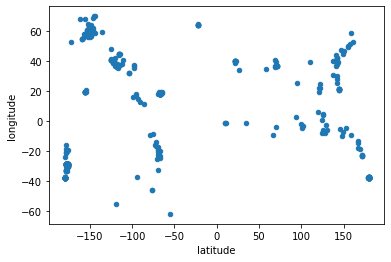

In [30]:
llp.plot(x='latitude', y='longitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
